/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 0.0504
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0406
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0366
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0365
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0348
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0350
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0416
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0359
Epoch 9/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0384
Epoch 10/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0361
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


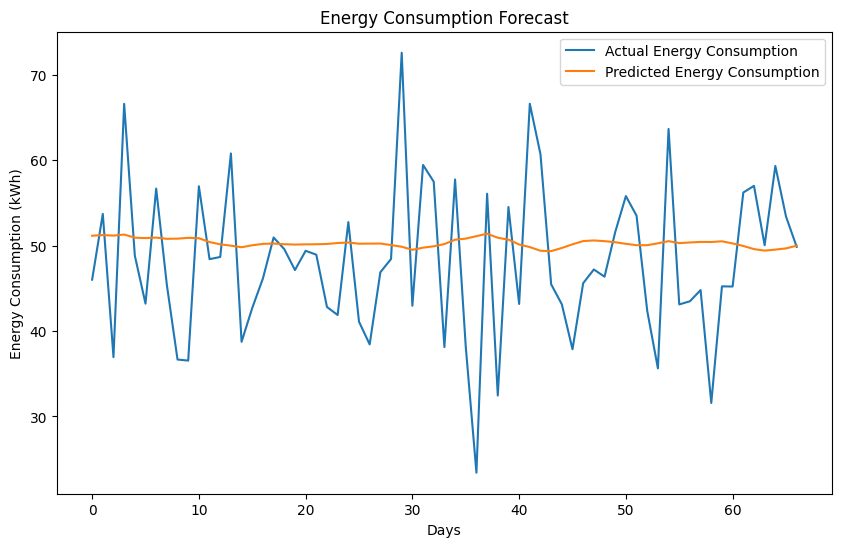

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Generate sample data (replace this with your own dataset)
# Assuming daily energy consumption in kilowatt-hours (kWh) over 365 days
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=365)  # Sample data generation

# Create a DataFrame
df = pd.DataFrame(data, columns=['Energy_Consumption'])
df.index = pd.date_range(start='1/1/2022', periods=len(df), freq='D')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Energy_Consumption']])

# Prepare data for LSTM model
def create_sequences(data, seq_length=30):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 30
x, y = create_sequences(scaled_data, sequence_length)

# Reshape data to 3D for LSTM [samples, time steps, features]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Split data into train and test sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Predict using the test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

# Prepare test data for plotting
actual_values = scaler.inverse_transform([y_test]).reshape(-1, 1)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_values, label='Actual Energy Consumption')
plt.plot(predictions, label='Predicted Energy Consumption')
plt.title('Energy Consumption Forecast')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()
